# Interactive drawing example

A simple drawing app:

* Draw dots by clicking with LMB.
* Toggle color by clicking RMB.

In [1]:
import numpy as np
import jupyter_rfb

RFBOutputContext()


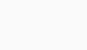

Drawingapp(css_height='400px', css_width='700px')

In [2]:
class Drawingapp(jupyter_rfb.RemoteFrameBuffer):
    
    def __init__(self):
        super().__init__()
        self.css_width = "700px"
        self.css_height = "400px"
        self.pixel_ratio = 1
        self.array = np.zeros((1, 1, 4), np.uint8)
        self.pen_colors = [(1, 0.2, 0, 1), (0, 1, 0.2, 1), (0.2, 0, 1, 1)]
        self.pen_index = 0        
    
    def handle_event(self, event):
        event_type = event.get("event_type", None)
        if event_type == "resize":
            # Take pixel ratio into account, use 8x less pixels (in each dim)
            self.pixel_ratio = event["pixel_ratio"] / 8
            w = int(event["width"] * self.pixel_ratio)
            h = int(event["height"] * self.pixel_ratio)
            self.array = np.ones((h, w, 4), np.uint8) * 5
        if event_type == "pointer_down":
            if event["button"] == 1:
                # Draw
                x = int(event["x"] * self.pixel_ratio)
                y = int(event["y"] * self.pixel_ratio)
                self.array[y, x] = 255 * np.array(self.pen_colors[self.pen_index])
                self.request_draw()
            elif event["button"] == 2:
                # Toggle color
                self.pen_index = (self.pen_index + 1) % len(self.pen_colors)
    
    def get_frame(self):
        return self.array
        

app = Drawingapp()
app

After some clicking ...


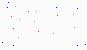

In [3]:
app.snapshot()